In [92]:
import cx_Oracle as oracle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter 
import numpy as np
import math
import seaborn as sns
import scipy.stats as stats  
import copy

## Analyse the feature 1——Peakhour Travel Days of The Month
we analyse the peakhour travel days of the month, which means the number of days a vehicle travel to the road network in the peak hour.

In [93]:
#该函数用来得到oracle中的表WORKDAY_PEAKHOUR_FREQ中的数据,并存为dataframe,格式与dateframe完全一样
db = oracle.connect()    # connect oracle database
print("database connected")
cursor = db.cursor()    # create cursor
cursor.execute('select * from WORKDAY_PEAKHOUR_FREQ')    # execute sql 
data = cursor.fetchall()    # fetch data
df_F1 = pd.DataFrame(data)

#change columns' name
df_F1.rename(columns={0:'CAR_NUM', 1:'F1_FM' , 2:'F1_FM_RATIO'}, inplace = True)
#print(df)
cursor.close()   #close the curse
db.close()   #close the database
print("database close")

database connected
database close


In [94]:
# have a look at df_F1
df_F1.head(5)

,CAR_NUM,F1_FM,F1_FM_RATIO
0,JL1681T,5,0.238095
1,KL33073,5,0.238095
2,NA15004,1,0.047619
3,NG20270,2,0.095238
4,NH58008,11,0.523810


In [95]:
# 从df_F1表中得到常规的统计指标，并绘制成图
df_F1.describe()

,F1_FM,F1_FM_RATIO
count,629586.000000,629586.000000
mean,5.490403,0.261448
std,5.360183,0.255247
min,1.000000,0.047619
25%,1.000000,0.047619
50%,3.000000,0.142857
75%,9.000000,0.428571
max,21.000000,1.000000


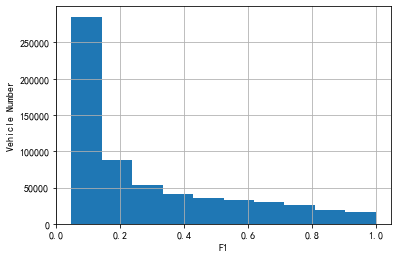

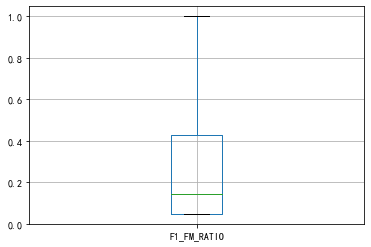

In [96]:
# 将df_F1中的F1_FM_RATIO绘制成直方图和箱型图

# 直方图绘制
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文字符
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
# plt.rcParams['savefig.dpi'] = 300 #图片像素
#plt.rcParams['figure.dpi'] = 300 #分辨率
plt.hist(df_F1['F1_FM_RATIO'], bins=10, range=None, weights=None, cumulative=False, bottom=None,\
         histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)
ax = plt.gca()
plt.grid()  
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
ax.set_xlabel('F1')
ax.set_ylabel('Vehicle Number')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

# 箱型图绘制
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文字符
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
# plt.rcParams['savefig.dpi'] = 300 #图片像素
#plt.rcParams['figure.dpi'] = 300 #分辨率
df_F1['F1_FM_RATIO'].plot(kind='box')
# axes.set_ylabel('values of tip_pct')
ax = plt.gca()
plt.grid()  
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

## Analyse the feature 2——Travel Days of The Month
we analyse the travel days of the month, which means the number of days a vehicle travel to the road network.

In [97]:
#该函数用来得到oracle中的表WORKDAY_TRA_FREQ中的数据,并存为dataframe,格式与dateframe完全一样
db = oracle.connect()    # connect oracle database
print("database connected")
cursor = db.cursor()    # create cursor
cursor.execute('select * from WORKDAY_TRA_FREQ')    # execute sql 
data = cursor.fetchall()    # fetch data
df_F2 = pd.DataFrame(data)

#change columns' name
df_F2.rename(columns={0:'CAR_NUM', 1:'F2_FM' , 2:'F2_FM_RATIO'}, inplace = True)
#print(df)
cursor.close()   #close the curse
db.close()   #close the database
print("database close")

database connected
database close


In [98]:
# have a look at df_F2
df_F2.head(5)

,CAR_NUM,F2_FM,F2_FM_RATIO
0,浙A837YS,21,1.000000
1,浙AR911W,21,1.000000
2,浙AJ183G,8,0.380952
3,浙A823JG,5,0.238095
4,浙A916KS,21,1.000000


In [99]:
# 从df_F2表中得到常规的统计指标，并绘制成图
df_F2.describe()

,F2_FM,F2_FM_RATIO
count,3.509489e+06,3.509489e+06
mean,4.061308e+00,1.933956e-01
std,5.330703e+00,2.538430e-01
min,1.000000e+00,4.761905e-02
25%,1.000000e+00,4.761905e-02
50%,1.000000e+00,4.761905e-02
75%,4.000000e+00,1.904762e-01
max,2.100000e+01,1.000000e+00


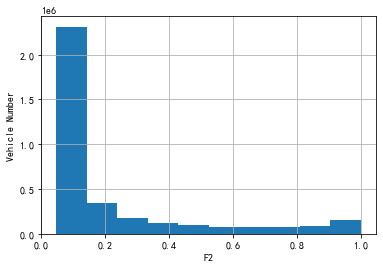

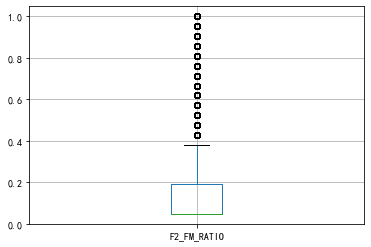

In [100]:
# 将df_F2中的F2_FM_RATIO绘制成直方图和箱型图

# 直方图绘制
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文字符
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
# plt.rcParams['savefig.dpi'] = 300 #图片像素
#plt.rcParams['figure.dpi'] = 300 #分辨率
plt.hist(df_F2['F2_FM_RATIO'], bins=10, range=None,  weights=None, cumulative=False, bottom=None,\
         histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)
ax = plt.gca()
plt.grid()  
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
ax.set_xlabel('F2')
ax.set_ylabel('Vehicle Number')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

# 箱型图绘制
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文字符
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
# plt.rcParams['savefig.dpi'] = 300 #图片像素
#plt.rcParams['figure.dpi'] = 300 #分辨率
df_F2['F2_FM_RATIO'].plot(kind='box')
# axes.set_ylabel('values of tip_pct')
ax = plt.gca()
plt.grid()  
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

## Analyse the feature 3&4——Average Offpeakhour Travel Frequency and standard deviation
we analyse the Average Offpeakhour Travel Frequency and standard deviation, which means the average frequency of the vehicles being detected in the road network in the offpeal hour and the standard deviation of the frequency of the vehicles being detected in the road network in the offpeal hour.

In [101]:
#该函数用来得到oracle中的表WORKDAY_TRA_FREQ中的数据,并存为dataframe,格式与dateframe完全一样
db = oracle.connect()    # connect oracle database
print("database connected")
cursor = db.cursor()    # create cursor
cursor.execute('select * from WORKDAY_OFFPEAK_STD_AND_AVG')    # execute sql 
data = cursor.fetchall()    # fetch data
df_F3_4 = pd.DataFrame(data)

#change columns' name
df_F3_4.rename(columns={0:'CAR_NUM', 1:'STD_FD' , 2:'AVG_FD'}, inplace = True)
#print(df)
cursor.close()   #close the curse
db.close()   #close the database
print("database close")

database connected
database close


In [102]:
# have a look at df_F3_4
df_F3_4.head(5)

,CAR_NUM,STD_FD,AVG_FD
0,浙AAS409,7.485061,12.444444
1,浙A6MC10,2.149197,2.571429
2,浙A2KM28,4.049691,7.400000
3,浙A776MY,8.565110,10.888889
4,浙A7KN19,9.153194,15.266667


In [103]:
# 从df_F3_4表中得到常规的统计指标，并绘制成图
df_F3_4.describe()

,STD_FD,AVG_FD
count,2.412918e+06,2.412918e+06
mean,1.252860e+00,3.149558e+00
std,2.273064e+00,3.627281e+00
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,1.000000e+00
50%,0.000000e+00,2.000000e+00
75%,1.940790e+00,4.000000e+00
max,9.377308e+01,4.050000e+02


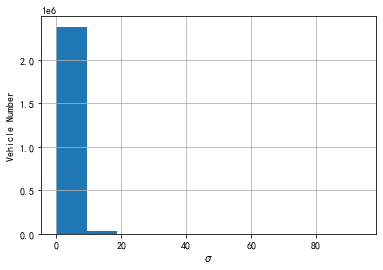

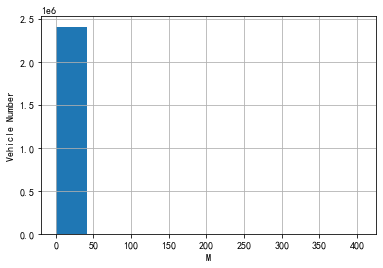

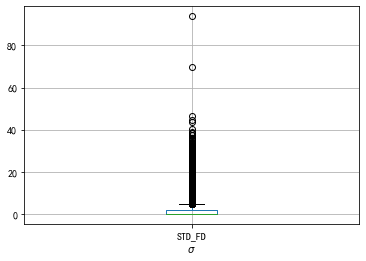

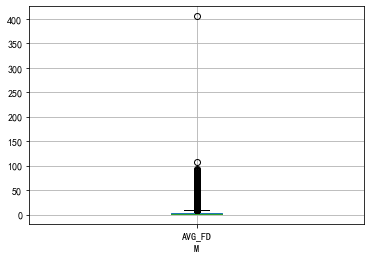

In [104]:
# 对df_F3_4进行分析，并将其绘制成直方图和箱型图

# STD_FD直方图绘制
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文字符
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
# plt.rcParams['savefig.dpi'] = 300 #图片像素
#plt.rcParams['figure.dpi'] = 300 #分辨率
plt.hist(df_F3_4['STD_FD'], bins=10, range=None, weights=None, cumulative=False, bottom=None,\
         histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)
ax = plt.gca()
plt.grid()  
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel('Vehicle Number')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

# AVG_FD直方图绘制
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文字符
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
# plt.rcParams['savefig.dpi'] = 300 #图片像素
#plt.rcParams['figure.dpi'] = 300 #分辨率
plt.hist(df_F3_4['AVG_FD'], bins=10, range=None, weights=None, cumulative=False, bottom=None,\
         histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)
ax = plt.gca()
plt.grid()  
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
ax.set_xlabel('M')
ax.set_ylabel('Vehicle Number')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

# STD_FD箱型图绘制
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文字符
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
# plt.rcParams['savefig.dpi'] = 300 #图片像素
#plt.rcParams['figure.dpi'] = 300 #分辨率
ax = plt.gca()
df_F3_4['STD_FD'].plot(kind='box' , ax = ax)
plt.grid()  
# ax.set_ylabel('values of tip_pct')
ax.set_xlabel(r'$\sigma$')
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

# AVG_FD箱型图绘制
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文字符
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
# plt.rcParams['savefig.dpi'] = 300 #图片像素
#plt.rcParams['figure.dpi'] = 300 #分辨率
df_F3_4['AVG_FD'].plot(kind='box')
ax = plt.gca()
plt.grid()  
# ax.set_ylabel('values of tip_pct')
ax.set_xlabel('M')
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

## Analyse the feature 5——OD的时间稳定性系数
1. Firstly, we analyse the $O_1$,$O_2$,$O_3$,$O_4$ to have a rough understanding of the indicators.

In [105]:
#该函数用来得到oracle中的表WORKDAY_TRA_FREQ中的数据,并存为dataframe,格式与dateframe完全一样
db = oracle.connect()    # connect oracle database
print("database connected")
cursor = db.cursor()    # create cursor
cursor.execute('select * from STABLE_RATIO_D1_NEW')    # execute sql 
data = cursor.fetchall()    # fetch data
df_D1 = pd.DataFrame(data)
#change columns' name
df_D1.rename(columns={0:'CAR_NUM', 1:'DEV_ID_1_D_2_P' , 2:'DEV_ID_2_D_1_P' , \
                      3:'STABLE_NUM1' , 4:'SAME_PLACE_NUM' , 5:'STABLE_NUM2' , 6:'STABLE_RATIO' }, inplace = True)

cursor.execute('select * from STABLE_RATIO_O1_NEW')    # execute sql 
data = cursor.fetchall()    # fetch data
df_O1 = pd.DataFrame(data)
#change columns' name
df_O1.rename(columns={0:'CAR_NUM', 1:'DEV_ID_1_D_2_P' , 2:'DEV_ID_2_D_1_P' , \
                      3:'STABLE_NUM1' , 4:'SAME_PLACE_NUM' , 5:'STABLE_NUM2' , 6:'STABLE_RATIO' }, inplace = True)

cursor.execute('select * from STABLE_RATIO_O2_NEW')    # execute sql 
data = cursor.fetchall()    # fetch data
df_O2 = pd.DataFrame(data)
#change columns' name
df_O2.rename(columns={0:'CAR_NUM', 1:'DEV_ID_1_D_2_P' , 2:'DEV_ID_2_D_1_P' , \
                      3:'STABLE_NUM1' , 4:'SAME_PLACE_NUM' , 5:'STABLE_NUM2' , 6:'STABLE_RATIO' }, inplace = True)

cursor.execute('select * from STABLE_RATIO_D2_NEW')    # execute sql 
data = cursor.fetchall()    # fetch data
df_D2 = pd.DataFrame(data)
#change columns' name
df_D2.rename(columns={0:'CAR_NUM', 1:'DEV_ID_1_D_2_P' , 2:'DEV_ID_2_D_1_P' , \
                      3:'STABLE_NUM1' , 4:'SAME_PLACE_NUM' , 5:'STABLE_NUM2' , 6:'STABLE_RATIO' }, inplace = True)
#print(df)
cursor.close()   #close the curse
db.close()   #close the database
print("database close")

database connected
database close


In [106]:
# have a look at df_O1,O2,D1,D2
print(df_O1.head(5))
print(df_D1.head(5))
print(df_O2.head(5))
print(df_D2.head(5))

   CAR_NUM DEV_ID_1_D_2_P DEV_ID_2_D_1_P  STABLE_NUM1  SAME_PLACE_NUM  \
0  BH11111           None           1352            1             NaN   
1  JAA0189           None        2147730            4             NaN   
2  KL11325           None        2147700            2             NaN   
3  KL21502           None        2147728            1             NaN   
4  ND00035           None        2147696            1             NaN   

   STABLE_NUM2  STABLE_RATIO  
0            1      0.047619  
1            4      0.190476  
2            2      0.095238  
3            1      0.047619  
4            1      0.047619  
   CAR_NUM DEV_ID_1_D_2_P DEV_ID_2_D_1_P  STABLE_NUM1  SAME_PLACE_NUM  \
0  EA15102           None           2311            1             NaN   
1  HF08613           None        2147734            1             NaN   
2  HF08745           None        2148430            2             NaN   
3  HO00143           None        2148023            1             NaN   
4  JA0D73L

In [107]:
# 从df_O1,O2,D1,D2表中得到常规的统计指标，并绘制成图
print(df_O1.describe())
print(df_D1.describe())
print(df_O2.describe())
print(df_D2.describe())

        STABLE_NUM1  SAME_PLACE_NUM   STABLE_NUM2  STABLE_RATIO
count  1.518712e+06   120734.000000  1.518712e+06  1.518712e+06
mean   2.601296e+00        3.981621  2.849636e+00  1.356939e-01
std    3.315938e+00        1.218435  3.811085e+00  1.814640e-01
min    1.000000e+00        3.000000  1.000000e+00  4.761905e-02
25%    1.000000e+00        3.000000  1.000000e+00  4.761905e-02
50%    1.000000e+00        4.000000  1.000000e+00  4.761905e-02
75%    2.000000e+00        5.000000  2.000000e+00  9.523810e-02
max    2.100000e+01       10.000000  2.900000e+01  1.000000e+00
        STABLE_NUM1  SAME_PLACE_NUM   STABLE_NUM2  STABLE_RATIO
count  1.518621e+06    98962.000000  1.518621e+06  1.518621e+06
mean   2.470851e+00        3.931741  2.660844e+00  1.267038e-01
std    3.228609e+00        1.192652  3.622029e+00  1.724602e-01
min    1.000000e+00        3.000000  1.000000e+00  4.761905e-02
25%    1.000000e+00        3.000000  1.000000e+00  4.761905e-02
50%    1.000000e+00        4.000000  1.0

In [108]:
df_O1.head(5)

,CAR_NUM,DEV_ID_1_D_2_P,DEV_ID_2_D_1_P,STABLE_NUM1,SAME_PLACE_NUM,STABLE_NUM2,STABLE_RATIO
0,BH11111,None,1352,1,NaN,1,0.047619
1,JAA0189,None,2147730,4,NaN,4,0.190476
2,KL11325,None,2147700,2,NaN,2,0.095238
3,KL21502,None,2147728,1,NaN,1,0.047619
4,ND00035,None,2147696,1,NaN,1,0.047619


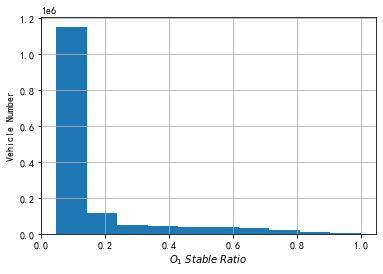

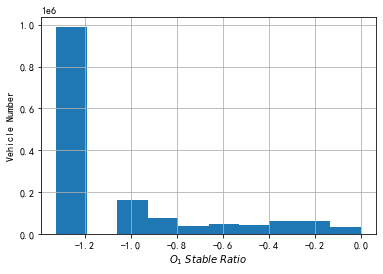

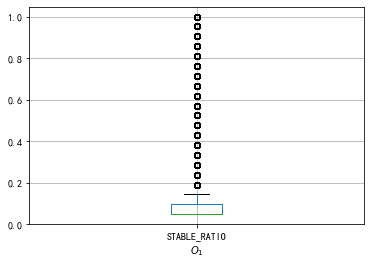

In [109]:
# 对df_O1,O2,D1,D2进行分析，并将其绘制成直方图和箱型图

# O1直方图绘制
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文字符
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
# plt.rcParams['savefig.dpi'] = 300 #图片像素
#plt.rcParams['figure.dpi'] = 300 #分辨率
plt.hist(df_O1['STABLE_RATIO'], bins=10, range=None,weights=None, cumulative=False, bottom=None,\
         histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)
ax = plt.gca()
plt.grid()  
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
ax.set_xlabel(r'$O_1\ Stable\ Ratio$')
ax.set_ylabel('Vehicle Number')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

# 对O1稳定性系数取log，因为后续要将4个稳定性系数相乘，这会使得最终的总的稳定性系数的方差非常大，因此考虑用log减小差距。
# 计算出取log10后的稳定性系数
df_O1_log = df_O1['STABLE_RATIO'].map(math.log10)
# 绘图
plt.hist(df_O1_log, bins=10, range=None,  weights=None, cumulative=False, bottom=None,\
         histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)
ax = plt.gca()
plt.grid()  
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
ax.set_xlabel(r'$O_1\ Stable\ Ratio$')
ax.set_ylabel('Vehicle Number')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

# O1稳定性系数箱型图绘制
df_O1['STABLE_RATIO'].plot(kind='box')
ax = plt.gca()
plt.grid()  
# ax.set_ylabel('values of tip_pct')
ax.set_xlabel(r'$O_1$')
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

# 仅展示O1，其余的分布等等应该都是差不多的。


**Analyse the $O_1*O_2*D_1*D_2$**
2. Sencondly, i analyse the $O_1*O_2*D_1*D_2$, to see the distribution of the indicator, and to judge whether choose the multiple result as the feature or just use 4 indicators as features directly. Besides, i will try the $O_1*O_2*D_1*D_2$ , $log(O_1*O_2*D_1*D_2)$ , $log(O_1)*log(O_2)*log(D_1)*log(D_2)$ respectively, to plot the distribution of these indicators to see which one will be the best feature option.

In [110]:
df_O1.rename(columns = {'STABLE_RATIO':'O1'} , inplace = True)
df_O2.rename(columns = {'STABLE_RATIO':'O2'} , inplace = True)
df_D1.rename(columns = {'STABLE_RATIO':'D1'} , inplace = True)
df_D2.rename(columns = {'STABLE_RATIO':'D2'} , inplace = True)

df_multi = pd.merge(df_O1[['CAR_NUM' , 'O1']] , df_D1[['CAR_NUM' , 'D1']] , how = 'inner' , on = 'CAR_NUM')
df_multi = pd.merge(df_multi , df_O2[['CAR_NUM' , 'O2']] , how = 'inner' , on = 'CAR_NUM') ; df_multi = pd.merge(df_multi , df_D2[['CAR_NUM' , 'D2']] , how = 'inner' , on = 'CAR_NUM')
df_multi['OD_Coei'] = df_multi['O1'] * df_multi['O2'] * df_multi['D1'] * df_multi['D2']
df_multi['OD_Coei_log_multi'] = (df_multi['O1'].map(math.log10)) * (df_multi['O2'].map(math.log10)) * (df_multi['D1'].map(math.log10)) * (df_multi['D2'].map(math.log10))
df_multi['OD_Coei_log'] = df_multi['OD_Coei'].map(math.log10)
df_multi.head(5)

,CAR_NUM,O1,D1,O2,D2,OD_Coei,OD_Coei_log_multi,OD_Coei_log
0,BH11111,0.047619,0.047619,0.095238,0.095238,0.000021,1.823138,-4.686817
1,JAA0189,0.190476,0.190476,0.047619,0.047619,0.000082,0.906701,-4.084757
2,KL11325,0.095238,0.095238,0.047619,0.047619,0.000021,1.823138,-4.686817
3,KL21502,0.047619,0.047619,0.095238,0.047619,0.000010,2.360569,-4.987847
4,ND00035,0.047619,0.047619,0.047619,0.047619,0.000005,3.056427,-5.288877


In [111]:
# have a rough understanding of the O1,D1,O2,D2
df_multi.describe()

,O1,D1,O2,D2,OD_Coei,OD_Coei_log_multi,OD_Coei_log
count,954774.000000,954774.000000,954774.000000,954774.000000,954774.000000,954774.000000,954774.000000
mean,0.181774,0.167918,0.157326,0.164895,0.015837,1.550104,-3.957850
std,0.211355,0.202116,0.180048,0.183548,0.059302,1.223129,1.442067
min,0.047619,0.047619,0.047619,0.047619,0.000005,0.000000,-5.288877
25%,0.047619,0.047619,0.047619,0.047619,0.000005,0.236727,-5.288877
50%,0.095238,0.047619,0.095238,0.095238,0.000031,1.508761,-4.510726
75%,0.238095,0.190476,0.190476,0.190476,0.000926,3.056427,-3.033605
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.056427,0.000000


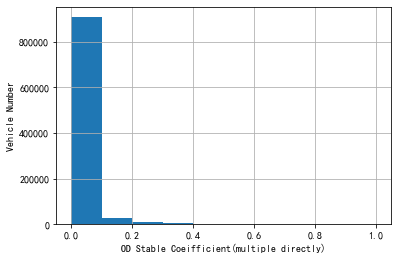

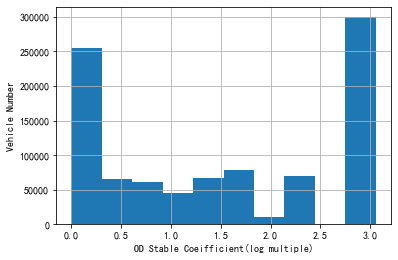

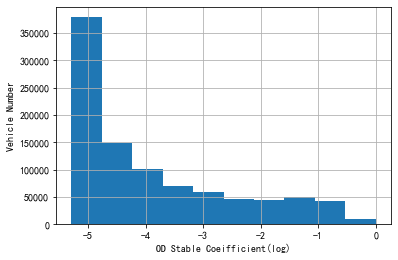

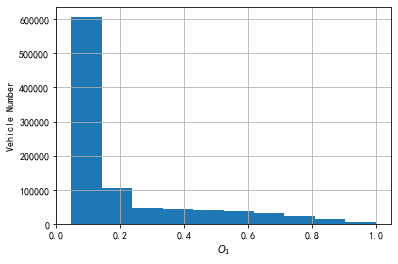

In [112]:
# 对df_O1,O2,D1,D2进行分析，并将其绘制成直方图和箱型图

# 将各种OD Coeifficient绘制直方图，观察其分布情况。
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文字符
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
# plt.rcParams['savefig.dpi'] = 300 #图片像素
#plt.rcParams['figure.dpi'] = 300 #分辨率
plt.hist(df_multi['OD_Coei'], bins=10, range=None,  weights=None, cumulative=False, bottom=None,\
         histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)
ax = plt.gca()
plt.grid()  
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
ax.set_xlabel(r'OD Stable Coeifficient(multiple directly)')
ax.set_ylabel('Vehicle Number')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

plt.hist(df_multi['OD_Coei_log_multi'], bins=10, range=None,  weights=None, cumulative=False, bottom=None,\
         histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)
ax = plt.gca()
plt.grid()  
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
ax.set_xlabel(r'OD Stable Coeifficient(log multiple)')
ax.set_ylabel('Vehicle Number')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

plt.hist(df_multi['OD_Coei_log'], bins=10, range=None,  weights=None, cumulative=False, bottom=None,\
         histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)
ax = plt.gca()
plt.grid()  
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
ax.set_xlabel(r'OD Stable Coeifficient(log)')
ax.set_ylabel('Vehicle Number')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

plt.hist(df_multi['O1'], bins=10, range=None,  weights=None, cumulative=False, bottom=None,\
         histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)
ax = plt.gca()
plt.grid()  
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
ax.set_xlabel(r'$O_1$')
ax.set_ylabel('Vehicle Number')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

## Analyse the feature 6——OD的空间稳定性系数
I analyse the OD's spatial stable coeifficient, which can reflect the stability of the travelers' $O_1 , D_1 , O_2 , D_2$. The detailed calculation method can be found in my paper.

In [113]:
#该函数用来得到oracle中的表WORKDAY_TRA_FREQ中的数据,并存为dataframe,格式与dateframe完全一样
db = oracle.connect()    # connect oracle database
print("database connected")
cursor = db.cursor()    # create cursor
cursor.execute('select * from OD_SPATIAL_STABLE_RATIO')    # execute sql 
data = cursor.fetchall()    # fetch data
df_FS = pd.DataFrame(data)
#change columns' name
df_FS.rename(columns={0:'CAR_NUM', 1:'FS'}, inplace = True)

#print(df)
cursor.close()   #close the curse
db.close()   #close the database
print("database close")

database connected
database close


In [114]:
# delete all the rows which Fs is NULL
df_FS.dropna(inplace = True)
df_FS.head(5)

,CAR_NUM,FS
2,BH11111,-4.664765
6,EA15102,0.269627
7,HF08613,-9.400239
8,HF08745,-1.041895
9,HO00143,-1.616044


In [115]:
df_FS.describe()

,FS
count,7.995600e+05
mean,-9.759897e+02
std,1.238233e+05
min,-6.478347e+07
25%,-2.315607e+00
50%,-1.267619e+00
75%,-7.431498e-01
max,1.000000e+00


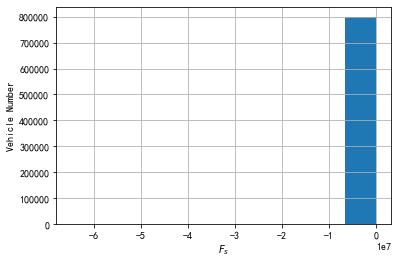

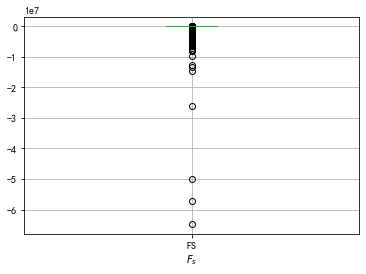

In [116]:
# 将各种OD Coeifficient绘制直方图，观察其分布情况。
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文字符
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
# plt.rcParams['savefig.dpi'] = 300 #图片像素
#plt.rcParams['figure.dpi'] = 300 #分辨率
plt.hist(df_FS['FS'], bins=10, range=None,  weights=None, cumulative=False, bottom=None,\
         histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)
ax = plt.gca()
plt.grid()  
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
ax.set_xlabel(r'$F_s$')
ax.set_ylabel('Vehicle Number')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

# Fs箱型图绘制
df_FS['FS'].plot(kind='box')
ax = plt.gca()
plt.grid()  
# ax.set_ylabel('values of tip_pct')
ax.set_xlabel(r'$F_s$')
# ax.set_title(u'车辆分布情况', fontproperties='SimHei',fontsize=14)  
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

## Analysis of all the features
I have combine all the features that are necessary for the commuting vehicle identification, So next i will analyse them in different aspects.

In [117]:
#该函数用来得到oracle中的表COMMUVEHFEAT中的数据,并存为dataframe,格式与dateframe完全一样
db = oracle.connect()    # connect oracle database
print("database connected")
cursor = db.cursor()    # create cursor
cursor.execute('select * from COMMUVEHFEAT')    # execute sql 
data = cursor.fetchall()    # fetch data
df_feat = pd.DataFrame(data)
#change columns' name
df_feat.rename(columns={0:'CAR_NUM', 1:'F1' , 2:'F2' , 3 : 'O1' , 4:'D1' , 5:'O2' , \
                      6:'D2' , 7:'FS' , 8:'STD_FD' , 9:'AVG_FD'}, inplace = True)

#print(df)
cursor.close()   #close the curse
db.close()   #close the database
print("database close")

database connected
database close


In [118]:
# see the data
df_feat.head(5)

,CAR_NUM,F1,F2,O1,D1,O2,D2,FS,STD_FD,AVG_FD
0,浙A837YS,0.428571,1.000000,0.476190,0.476190,0.380952,0.238095,-6.986293,1.417930,3.700000
1,浙AR911W,0.809524,1.000000,0.857143,0.809524,0.666667,0.714286,0.630876,3.113023,6.090909
2,浙AJ183G,0.047619,0.380952,0.095238,0.142857,0.047619,0.047619,-1.105313,0.547723,1.600000
3,浙A916KS,0.285714,1.000000,0.190476,0.142857,0.380952,0.333333,-1.348978,2.097060,3.210526
4,浙AB926K,0.142857,0.476190,0.142857,0.095238,0.047619,0.047619,-7.187497,2.516611,4.000000


In [119]:
# have a rough understanding of the data
df_feat.describe()

,F1,F2,O1,D1,O2,D2,FS,STD_FD,AVG_FD
count,565629.000000,565629.000000,565629.000000,565629.000000,565629.000000,565629.000000,5.656290e+05,565629.000000,565629.000000
mean,0.269822,0.606201,0.243693,0.222812,0.202714,0.214282,-7.489968e+02,3.129255,5.216787
std,0.259676,0.288787,0.235685,0.228191,0.202253,0.204485,1.227174e+05,3.057755,5.396728
min,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,-6.478347e+07,0.000000,0.000000
25%,0.047619,0.380952,0.047619,0.047619,0.047619,0.047619,-1.965441e+00,1.092906,2.545455
50%,0.142857,0.666667,0.142857,0.095238,0.095238,0.142857,-1.131236e+00,2.554892,4.062500
75%,0.428571,0.857143,0.380952,0.333333,0.285714,0.333333,-4.098045e-01,4.226898,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,93.773080,92.238095


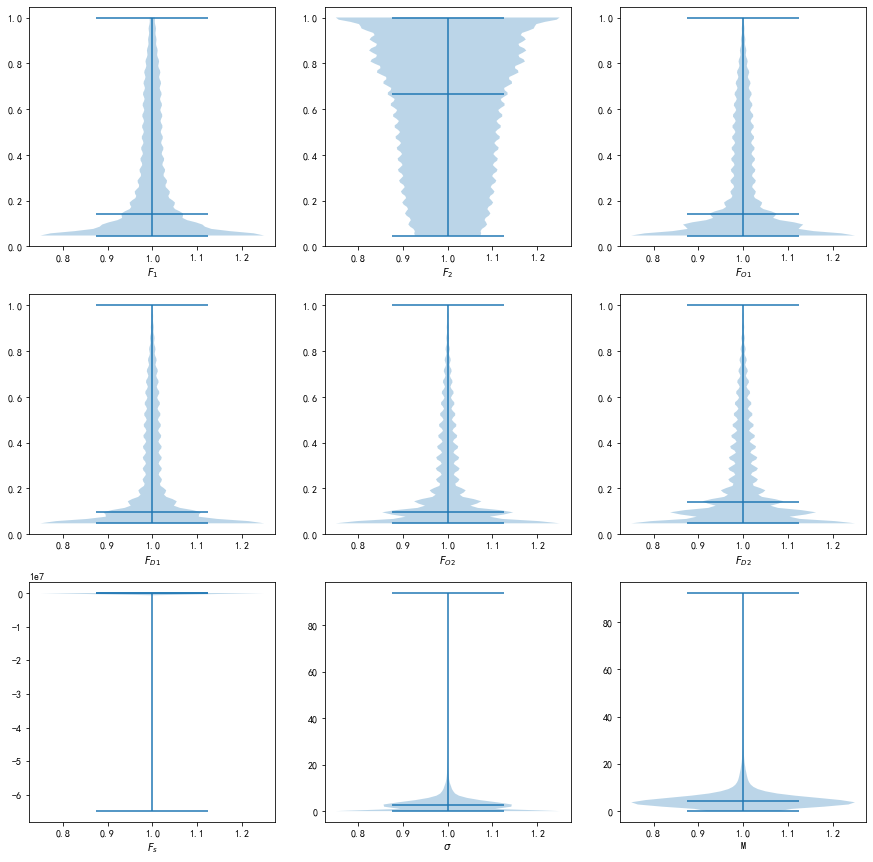

In [120]:
# plot the box plot, so that we can see the distribution of all the features.
fig,((ax1, ax2, ax3), (ax4 ,ax5, ax6), (ax7, ax8 , ax9)) = plt.subplots(3, 3, sharex = False,figsize=(15, 15))
# ax1 = plt.subplot(3, 3, 1,figsize=(10, 11))
ax1.violinplot(dataset = df_feat["F1"] , showmedians = True , showextrema = True  , points = 100)
ax1.set_xlabel(r'$F_1$')
# # ax2 = plt.subplot(3, 3, 2)
ax2.violinplot(dataset = df_feat["F2"] , showmedians = True , showextrema = True  , points = 100 )
ax2.set_xlabel(r'$F_2$')
ax3.violinplot(dataset = df_feat["O1"] , showmedians = True , showextrema = True  , points = 100 )
ax3.set_xlabel(r'$F_{O1}$')
ax4.violinplot(dataset = df_feat["D1"]  , showmedians = True , showextrema = True , points = 100 )
ax4.set_xlabel(r'$F_{D1}$')
ax5.violinplot(dataset = df_feat["O2"]  , showmedians = True , showextrema = True  , points = 100)
ax5.set_xlabel(r'$F_{O2}$')
ax6.violinplot(dataset = df_feat["D2"]  , showmedians = True , showextrema = True  , points = 100)
ax6.set_xlabel(r'$F_{D2}$')
ax7.violinplot(dataset = df_feat["FS"]  , showmedians = True , showextrema = True , points = 100 )
ax7.set_xlabel(r'$F_s$')
ax8.violinplot(dataset = df_feat["STD_FD"]  , showmedians = True , showextrema = True  , points = 100)
ax8.set_xlabel(r'$\sigma$')
ax9.violinplot(dataset = df_feat["AVG_FD"]  , showmedians = True , showextrema = True  , points = 100)
ax9.set_xlabel('M')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

9个feature的分布情况，绘制出对应的直方图

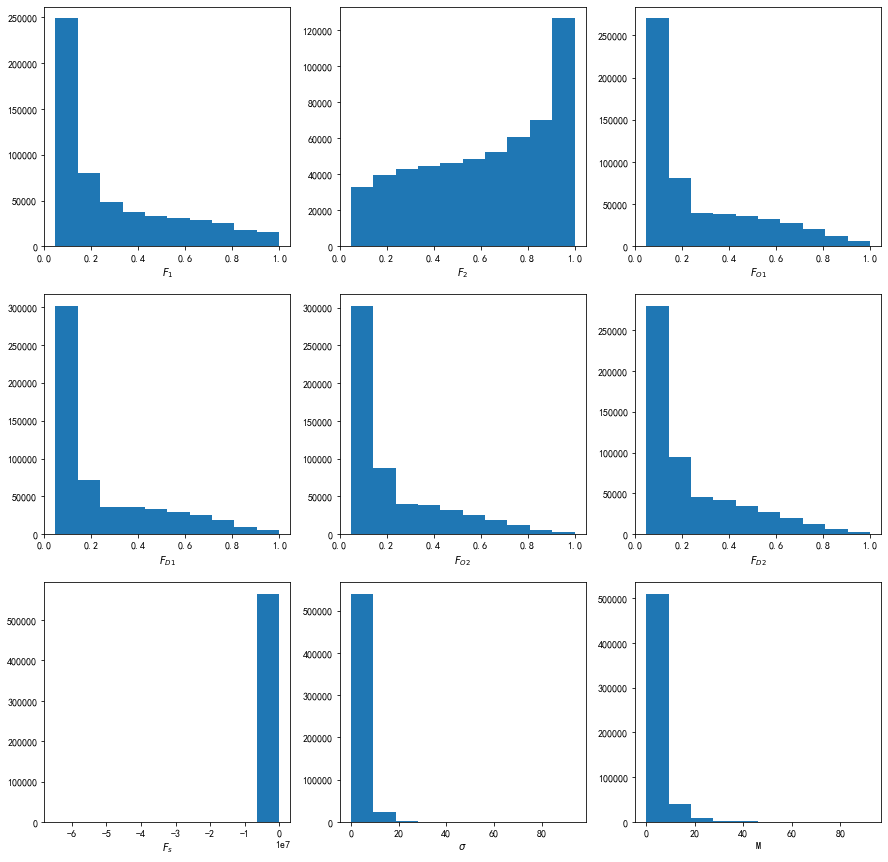

In [121]:
# plot the histogram, so that we can see the distribution of all the features.
fig,((ax1, ax2, ax3), (ax4 ,ax5, ax6), (ax7, ax8 , ax9)) = plt.subplots(3, 3, sharex = False,figsize=(15, 15))
# ax1 = plt.subplot(3, 3, 1,figsize=(10, 11))
ax1.hist(x = df_feat["F1"] , range = None)
ax1.set_xlabel(r'$F_1$')
# # ax2 = plt.subplot(3, 3, 2)
ax2.hist(x = df_feat["F2"] , range = None )
ax2.set_xlabel(r'$F_2$')
ax3.hist(x = df_feat["O1"] , range = None )
ax3.set_xlabel(r'$F_{O1}$')
ax4.hist(x = df_feat["D1"]  , range = None )
ax4.set_xlabel(r'$F_{D1}$')
ax5.hist(x = df_feat["O2"]  , range = None)
ax5.set_xlabel(r'$F_{O2}$')
ax6.hist(x = df_feat["D2"]  , range = None)
ax6.set_xlabel(r'$F_{D2}$')
ax7.hist(x = df_feat["FS"]  , range = None)
ax7.set_xlabel(r'$F_s$')
ax8.hist(x = df_feat["STD_FD"]  , range = None)
ax8.set_xlabel(r'$\sigma$')
ax9.hist(x = df_feat["AVG_FD"]   , range = None)
ax9.set_xlabel('M')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

## Correlation of the 9 Features

In [122]:
# get the pearson correlation
df_feat.corr(method='pearson')

,F1,F2,O1,D1,O2,D2,FS,STD_FD,AVG_FD
F1,1.000000,0.680997,0.751806,0.721022,0.696230,0.702335,0.003472,0.213653,0.264318
F2,0.680997,1.000000,0.616148,0.574667,0.567240,0.587423,0.001186,0.296724,0.229044
O1,0.751806,0.616148,1.000000,0.910448,0.651170,0.653894,0.001683,-0.071783,-0.061854
D1,0.721022,0.574667,0.910448,1.000000,0.684296,0.650834,0.001412,-0.130301,-0.117038
O2,0.696230,0.567240,0.651170,0.684296,1.000000,0.877002,0.002289,-0.108380,-0.090759
D2,0.702335,0.587423,0.653894,0.650834,0.877002,1.000000,0.002856,-0.085676,-0.077198
FS,0.003472,0.001186,0.001683,0.001412,0.002289,0.002856,1.000000,0.002340,0.002515
STD_FD,0.213653,0.296724,-0.071783,-0.130301,-0.108380,-0.085676,0.002340,1.000000,0.809663
AVG_FD,0.264318,0.229044,-0.061854,-0.117038,-0.090759,-0.077198,0.002515,0.809663,1.000000


In [123]:
# get the spearnman correlation
df_feat.corr(method='spearman')  # 斯皮尔曼秩相关系数

,F1,F2,O1,D1,O2,D2,FS,STD_FD,AVG_FD
F1,1.000000,0.735326,0.768445,0.731859,0.691276,0.701924,0.304416,0.204231,0.167672
F2,0.735326,1.000000,0.658295,0.613270,0.637908,0.649494,0.135183,0.332355,0.228133
O1,0.768445,0.658295,1.000000,0.897545,0.608786,0.615180,0.285866,0.027215,-0.010299
D1,0.731859,0.613270,0.897545,1.000000,0.626116,0.609907,0.289841,-0.047100,-0.082101
O2,0.691276,0.637908,0.608786,0.626116,1.000000,0.853231,0.265987,-0.007619,-0.051379
D2,0.701924,0.649494,0.615180,0.609907,0.853231,1.000000,0.278005,0.030190,-0.011384
FS,0.304416,0.135183,0.285866,0.289841,0.265987,0.278005,1.000000,-0.027650,0.004232
STD_FD,0.204231,0.332355,0.027215,-0.047100,-0.007619,0.030190,-0.027650,1.000000,0.780579
AVG_FD,0.167672,0.228133,-0.010299,-0.082101,-0.051379,-0.011384,0.004232,0.780579,1.000000


In [124]:
# get the significance of the spearman correlation
spearmanresult = stats.spearmanr(df_feat_copy[['F1' , 'F2' , 'O1' , 'D1' , 'O2' , 'D2' , 'FS' , 'STD_FD' , 'AVG_FD']].values)
spearmanresult

SpearmanrResult(correlation=array([[ 1.        ,  0.73925367,  0.77067914,  0.73310411,  0.69316298,
         0.70166733,  0.28557113,  0.17632803,  0.13856577],
       [ 0.73925367,  1.        ,  0.65277503,  0.60731601,  0.63103896,
         0.63996803,  0.13161508,  0.28101875,  0.17131488],
       [ 0.77067914,  0.65277503,  1.        ,  0.89393383,  0.62409909,
         0.62994588,  0.29265406, -0.01071805, -0.04904387],
       [ 0.73310411,  0.60731601,  0.89393383,  1.        ,  0.64457766,
         0.62498854,  0.30389521, -0.08506629, -0.12054738],
       [ 0.69316298,  0.63103896,  0.62409909,  0.64457766,  1.        ,
         0.84652423,  0.27872534, -0.04852942, -0.09195527],
       [ 0.70166733,  0.63996803,  0.62994588,  0.62498854,  0.84652423,
         1.        ,  0.28850217, -0.01308571, -0.05410525],
       [ 0.28557113,  0.13161508,  0.29265406,  0.30389521,  0.27872534,
         0.28850217,  1.        , -0.05836032, -0.02377757],
       [ 0.17632803,  0.28101875, 

In [125]:
# display the spearman correlation of 9 features using the stats package
speacorr = pd.DataFrame(spearmanresult[0])
speacorr

,0,1,2,3,4,5,6,7,8
0,1.000000,0.739254,0.770679,0.733104,0.693163,0.701667,0.285571,0.176328,0.138566
1,0.739254,1.000000,0.652775,0.607316,0.631039,0.639968,0.131615,0.281019,0.171315
2,0.770679,0.652775,1.000000,0.893934,0.624099,0.629946,0.292654,-0.010718,-0.049044
3,0.733104,0.607316,0.893934,1.000000,0.644578,0.624989,0.303895,-0.085066,-0.120547
4,0.693163,0.631039,0.624099,0.644578,1.000000,0.846524,0.278725,-0.048529,-0.091955
5,0.701667,0.639968,0.629946,0.624989,0.846524,1.000000,0.288502,-0.013086,-0.054105
6,0.285571,0.131615,0.292654,0.303895,0.278725,0.288502,1.000000,-0.058360,-0.023778
7,0.176328,0.281019,-0.010718,-0.085066,-0.048529,-0.013086,-0.058360,1.000000,0.757713
8,0.138566,0.171315,-0.049044,-0.120547,-0.091955,-0.054105,-0.023778,0.757713,1.000000


In [126]:
# display the spearman correlation's significance 
speasig = pd.DataFrame(spearmanresult[1])
speasig

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.321265e-13,6.922399e-252
3,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.143964e-246,0.000000e+00
5,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.570768e-19,3.604098e-306
6,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.218387e-60
7,0.0,0.0,1.321265e-13,0.0,1.143964e-246,1.570768e-19,0.000000e+00,0.000000e+00,0.000000e+00
8,0.0,0.0,6.922399e-252,0.0,0.000000e+00,3.604098e-306,1.218387e-60,0.000000e+00,0.000000e+00


## Outliers detection and analysis
In this research, i find $F_s,\sigma ,M$ have outliers, so next, i will deal with these three features to delete the outliers. And this will be ok because if $F_s$ is too small, which means the vehicle's OD in the morning peak and evening peak are pretty different, so the vehicle can not be the commuting vehicles.If $\sigma$ is way big, which means the vehicle's behibour in the offpeak hour is pretty different, which means the vehicle can not be the commuting vehicle. If the M is pretty big, which means the vehicle in the off peak hour usually travel in the road network, so it also can not be the commuting vehicle.

In [127]:
df_feat.head(5)

,CAR_NUM,F1,F2,O1,D1,O2,D2,FS,STD_FD,AVG_FD
0,浙A837YS,0.428571,1.000000,0.476190,0.476190,0.380952,0.238095,-6.986293,1.417930,3.700000
1,浙AR911W,0.809524,1.000000,0.857143,0.809524,0.666667,0.714286,0.630876,3.113023,6.090909
2,浙AJ183G,0.047619,0.380952,0.095238,0.142857,0.047619,0.047619,-1.105313,0.547723,1.600000
3,浙A916KS,0.285714,1.000000,0.190476,0.142857,0.380952,0.333333,-1.348978,2.097060,3.210526
4,浙AB926K,0.142857,0.476190,0.142857,0.095238,0.047619,0.047619,-7.187497,2.516611,4.000000


**deal with the feature $F_s$**

here i use the numeric outliers detection. The detail can be found in the paper.

In [128]:
IQR = abs(np.percentile(df_feat['FS'] , 75) - np.percentile(df_feat['FS'] , 25))
lowerbound = np.percentile(df_feat['FS'] , 25) - 1.5 * IQR
df_feat_copy = copy.deepcopy(df_feat)
df_feat_copy[df_feat_copy['FS'] < lowerbound] = None
df_feat_copy.dropna(inplace = True)

**deal with the feature $\sigma$** 

In [129]:
IQR = abs(np.percentile(df_feat['STD_FD'] , 75) - np.percentile(df_feat['STD_FD'] , 25))
upperbound = np.percentile(df_feat['STD_FD'] , 75) + 1.5 * IQR
print(IQR)
df_feat_copy[df_feat_copy['STD_FD'] > upperbound] = None
df_feat_copy.dropna(inplace = True)

3.133991575055629


**deal with the feature $M$**

In [130]:
IQR = abs(np.percentile(df_feat['AVG_FD'] , 75) - np.percentile(df_feat['AVG_FD'] , 25))
upperbound = np.percentile(df_feat['AVG_FD'] , 75) + 1.5 * IQR
df_feat_copy[df_feat_copy['AVG_FD'] > upperbound] = None
df_feat_copy.dropna(inplace = True)

**Plot the distribution of the features that are after outliers deleting**

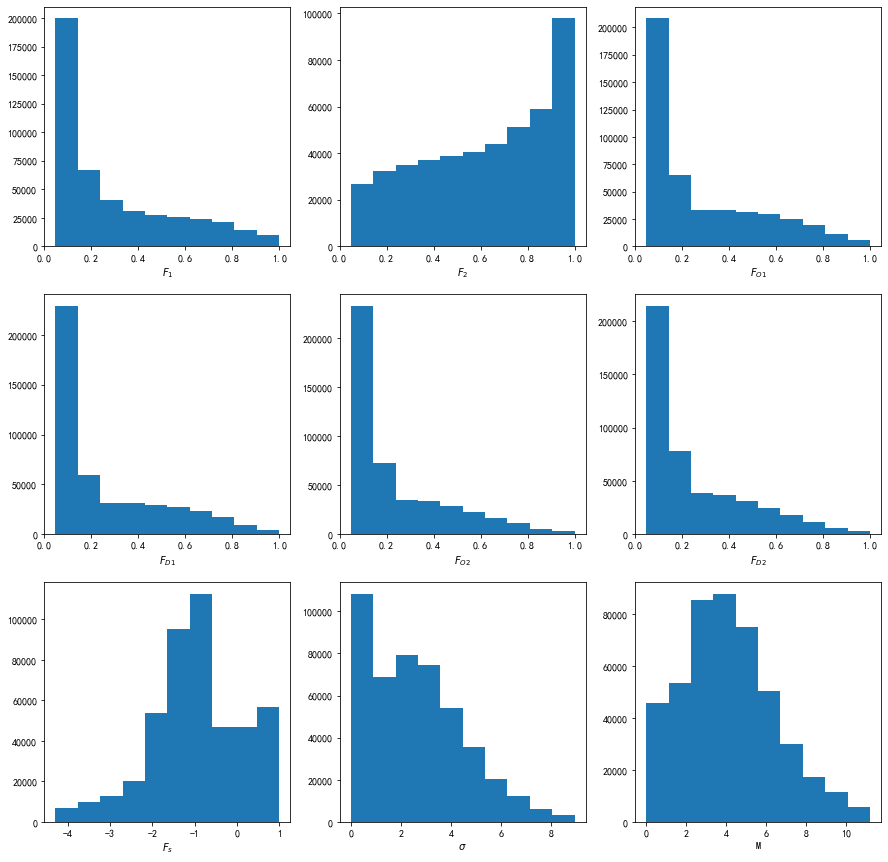

In [131]:
# plot the histogram, so that we can see the distribution of all the features.
fig,((ax1, ax2, ax3), (ax4 ,ax5, ax6), (ax7, ax8 , ax9)) = plt.subplots(3, 3, sharex = False,figsize=(15, 15))
# ax1 = plt.subplot(3, 3, 1,figsize=(10, 11))
ax1.hist(x = df_feat_copy["F1"] , range = None)
ax1.set_xlabel(r'$F_1$')
# # ax2 = plt.subplot(3, 3, 2)
ax2.hist(x = df_feat_copy["F2"] , range = None )
ax2.set_xlabel(r'$F_2$')
ax3.hist(x = df_feat_copy["O1"] , range = None )
ax3.set_xlabel(r'$F_{O1}$')
ax4.hist(x = df_feat_copy["D1"]  , range = None )
ax4.set_xlabel(r'$F_{D1}$')
ax5.hist(x = df_feat_copy["O2"]  , range = None)
ax5.set_xlabel(r'$F_{O2}$')
ax6.hist(x = df_feat_copy["D2"]  , range = None)
ax6.set_xlabel(r'$F_{D2}$')
ax7.hist(x = df_feat_copy["FS"]  , range = None)
ax7.set_xlabel(r'$F_s$')
ax8.hist(x = df_feat_copy["STD_FD"]  , range = None)
ax8.set_xlabel(r'$\sigma$')
ax9.hist(x = df_feat_copy["AVG_FD"]   , range = None)
ax9.set_xlabel('M')
# plt.savefig('子样本车辆分布情况_new.png')
plt.show()

**把得到的全样本经过处理后的feature存为csv保存在本地，之后的分析都基于这个处理后的feature的透视表展开**

## Correlation of the 9 Features that are after processing

In [132]:
# get the spearnman correlation
df_feat_copy.corr(method='spearman')  # 斯皮尔曼秩相关系数

,F1,F2,O1,D1,O2,D2,FS,STD_FD,AVG_FD
F1,1.000000,0.732246,0.813334,0.799006,0.751346,0.758314,0.317060,0.133279,0.097966
F2,0.732246,1.000000,0.697953,0.669109,0.679251,0.692499,0.147171,0.288341,0.183868
O1,0.813334,0.697953,1.000000,0.909807,0.641574,0.644286,0.290698,0.045312,0.012891
D1,0.799006,0.669109,0.909807,1.000000,0.658641,0.638371,0.301625,-0.010662,-0.040328
O2,0.751346,0.679251,0.641574,0.658641,1.000000,0.867017,0.282688,0.011349,-0.025980
D2,0.758314,0.692499,0.644286,0.638371,0.867017,1.000000,0.285390,0.053633,0.018922
FS,0.317060,0.147171,0.290698,0.301625,0.282688,0.285390,1.000000,-0.033209,0.004187
STD_FD,0.133279,0.288341,0.045312,-0.010662,0.011349,0.053633,-0.033209,1.000000,0.750704
AVG_FD,0.097966,0.183868,0.012891,-0.040328,-0.025980,0.018922,0.004187,0.750704,1.000000


In [133]:
# get the significance of the spearman correlation
spearmanresult = stats.spearmanr(df_feat_copy[['F1' , 'F2' , 'O1' , 'D1' , 'O2' , 'D2' , 'FS' , 'STD_FD' , 'AVG_FD']].values)
spearmanresult

SpearmanrResult(correlation=array([[ 1.        ,  0.73224574,  0.81333397,  0.79900618,  0.7513458 ,
         0.75831418,  0.31705984,  0.13327895,  0.09796587],
       [ 0.73224574,  1.        ,  0.69795262,  0.6691086 ,  0.67925115,
         0.69249924,  0.14717143,  0.28834132,  0.18386773],
       [ 0.81333397,  0.69795262,  1.        ,  0.90980748,  0.64157419,
         0.64428648,  0.29069788,  0.04531167,  0.01289075],
       [ 0.79900618,  0.6691086 ,  0.90980748,  1.        ,  0.65864072,
         0.63837116,  0.30162508, -0.01066201, -0.04032827],
       [ 0.7513458 ,  0.67925115,  0.64157419,  0.65864072,  1.        ,
         0.86701739,  0.28268802,  0.01134864, -0.02597974],
       [ 0.75831418,  0.69249924,  0.64428648,  0.63837116,  0.86701739,
         1.        ,  0.28538989,  0.05363315,  0.01892226],
       [ 0.31705984,  0.14717143,  0.29069788,  0.30162508,  0.28268802,
         0.28538989,  1.        , -0.03320855,  0.004187  ],
       [ 0.13327895,  0.28834132, 

In [134]:
# display the spearman correlation of 9 features using the stats package
speacorr = pd.DataFrame(spearmanresult[0])
speacorr

,0,1,2,3,4,5,6,7,8
0,1.000000,0.732246,0.813334,0.799006,0.751346,0.758314,0.317060,0.133279,0.097966
1,0.732246,1.000000,0.697953,0.669109,0.679251,0.692499,0.147171,0.288341,0.183868
2,0.813334,0.697953,1.000000,0.909807,0.641574,0.644286,0.290698,0.045312,0.012891
3,0.799006,0.669109,0.909807,1.000000,0.658641,0.638371,0.301625,-0.010662,-0.040328
4,0.751346,0.679251,0.641574,0.658641,1.000000,0.867017,0.282688,0.011349,-0.025980
5,0.758314,0.692499,0.644286,0.638371,0.867017,1.000000,0.285390,0.053633,0.018922
6,0.317060,0.147171,0.290698,0.301625,0.282688,0.285390,1.000000,-0.033209,0.004187
7,0.133279,0.288341,0.045312,-0.010662,0.011349,0.053633,-0.033209,1.000000,0.750704
8,0.097966,0.183868,0.012891,-0.040328,-0.025980,0.018922,0.004187,0.750704,1.000000


In [135]:
# display the spearman correlation's significance 
speasig = pd.DataFrame(spearmanresult[1])
speasig

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.251730e-208,1.867897e-18
3,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.183887e-13,1.171525e-165
4,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.196906e-14,7.526851e-70
5,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.469430e-291,6.930477e-38
6,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.052108e-113,4.415786e-03
7,0.0,0.0,1.251730e-208,4.183887e-13,1.196906e-14,1.469430e-291,6.052108e-113,0.000000e+00,0.000000e+00
8,0.0,0.0,1.867897e-18,1.171525e-165,7.526851e-70,6.930477e-38,4.415786e-03,0.000000e+00,0.000000e+00


## Save the data after processing

In [136]:
df_feat_copy.to_csv("TotalSampleAfterProcessing.csv" , encoding = 'gbk')

**至此关于通勤车模式识别的feature提取、预处理以及分析部分便已经全部结束了，接下来我将再开一个notebook，进行因子分析，以及后续的聚类，决策树模型等等**